In [2]:
# 安裝套件
!pip install -q transformers

## 情感分析 (sentiment analysis)
Hugging Face 是一個公開的 AI 社群，它支援主流的深度學習框架，並提供豐富的預訓練模型、資料集以及開發工具，涵蓋自然語言處理、語音辨識、影像辨識等多種 AI 應用。以情感分析為例，下面的圖展示了 Hugging Face 模型的整體運作流程，而我們可以使用 pipeline 工具，將所有的過程封裝在一起，讓我們使用更加方便。

![](https://i.imgur.com/4UlFC5r.png)

#### 1. 對輸入句子進行分詞和編碼
- 分詞器(tokenizer)將輸入的句子分割成單詞(tokens)。
- 接著將這些單詞(tokens)轉換為相對應的token id，同時添加預訓練模型所需的特殊token（例如：[CLS]、[SEP]）。

#### 2. 載入 Hugging Face 模型
一旦分詞和編碼的工作完成，我們可以直接將處理好的結果傳遞給相對應的模型，然後取得預測結果。

#### 3. 輸出預測結果
輸出結果依據喜好程度從最低1星到最高5星。

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# 使用指定的預訓練模型初始化分詞器
tokenizer = AutoTokenizer.from_pretrained("techthiyanes/chinese_sentiment")
# 使用指定的預訓練模型初始化序列分類模型
model = AutoModelForSequenceClassification.from_pretrained("techthiyanes/chinese_sentiment")
# 使用pipeline創建一個情感分析的工具
review_classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, top_k=5)

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [2]:
# Example 1
review_classifier("環境乾淨且服務人員很親切，餐點口味很棒而且食物新鮮!")

[[{'label': 'star 5', 'score': 0.6823225617408752},
  {'label': 'star 4', 'score': 0.26904016733169556},
  {'label': 'star 3', 'score': 0.03292671963572502},
  {'label': 'star 2', 'score': 0.01019265130162239},
  {'label': 'star 1', 'score': 0.005517883226275444}]]

In [3]:
# Example 2
review_classifier("上餐速度太慢，食物普通。")

[[{'label': 'star 2', 'score': 0.40975552797317505},
  {'label': 'star 3', 'score': 0.34248214960098267},
  {'label': 'star 1', 'score': 0.1721179038286209},
  {'label': 'star 4', 'score': 0.06531713157892227},
  {'label': 'star 5', 'score': 0.010327262803912163}]]

## 使用 SHAP 解析語言模型

In [ ]:
!pip install -q shap

In [4]:
import shap

explainer = shap.Explainer(review_classifier)

In [5]:
shap_values = explainer(["環境乾淨且服務人員很親切，餐點口味很棒而且食物新鮮!"])

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 2it [00:14, 14.26s/it]               


In [8]:
shap_values.shape

(1, 28, 5)

In [9]:
shap.plots.text(shap_values)

In [72]:
index = 0
pred_class = 4
x = sum(shap_values[index,:,pred_class].values)+shap_values[index].base_values[pred_class]
x

0.6823225617408752

In [7]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
# !gdown 1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_

import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

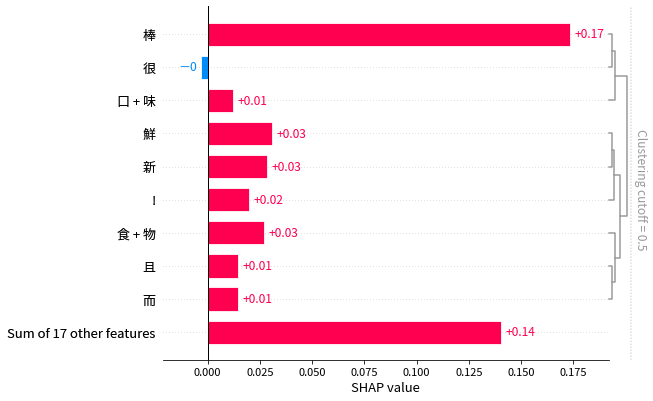

In [16]:
import matplotlib.pylab as plt

# shap.plots.bar(shap_values[0,:,4], max_display=28)
shap.plots.bar(shap_values[0,:,4], clustering_cutoff=0.5)

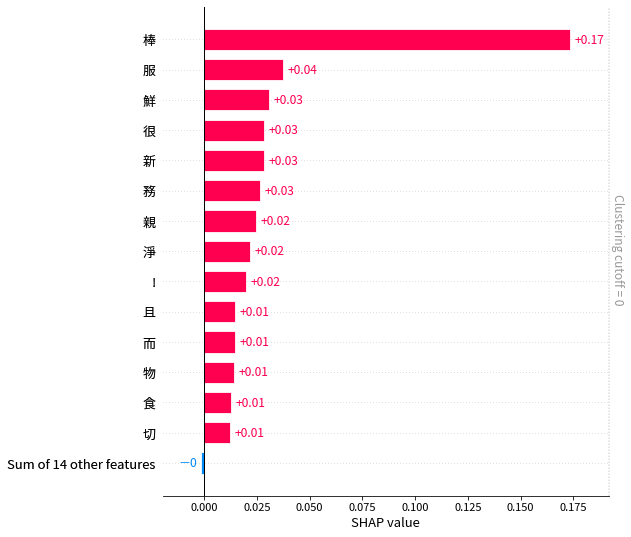

In [17]:
import matplotlib.pylab as plt

shap.plots.bar(shap_values[0,:,4], max_display=15, clustering_cutoff=0, order=shap.Explanation.argsort.flip)